In [168]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_california_housing
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [169]:
# Load the dataset
housing = fetch_california_housing()

In [170]:
print(set(housing))
print(housing['data'].shape)
print(housing['target'].shape)
print(housing['feature_names'])
print(housing['target_names'])
print(housing['data'][:5])

{'data', 'DESCR', 'target', 'frame', 'feature_names', 'target_names'}
(20640, 8)
(20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]


In [171]:
# Create train dataframe
df_train = pd.DataFrame(housing['data'], columns=housing['feature_names'])
df_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [172]:
# Check for null values
print(df_train.isna().sum())
print(df_train.dtypes)
df_train.describe()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


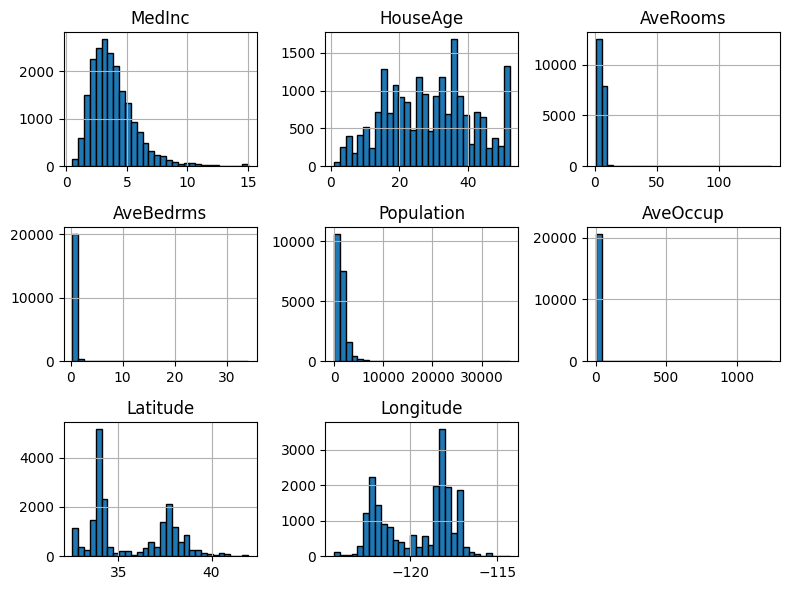

In [173]:
# Plot histograms
df_train.hist(bins=30, figsize=(8, 6), edgecolor='black')
plt.tight_layout()
plt.show()

In [174]:
# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train,housing['target'], random_state=42, test_size=0.2, shuffle=True)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [175]:
# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Handle the shapes
y_train = y_train.unsqueeze(1)
y_test = y_test.unsqueeze(1)

In [176]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([16512, 8]),
 torch.Size([16512, 1]),
 torch.Size([4128, 8]),
 torch.Size([4128, 1]))

# Building the Model

In [177]:
# Define the model structure
class IncomeClassifier(nn.Module):
    def __init__(self, input_size):
        super().__init__()

        # Define layers
        self.layer1 = nn.Linear(input_size, 100)
        self.layer2 = nn.Linear(100, 10)
        self.output = nn.Linear(10, 1)

        # Define activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

In [178]:
# Initiating the model
patience = 10
input_size = 8
model = IncomeClassifier(input_size)

# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=patience)

# Create a dataset from the tensors
train_dataset = TensorDataset(X_train, y_train)

# Create a DataLoader for mini-batch training
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [179]:
epochs = 50
best_val_loss = float('inf')
for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0

    # Zero the gradients before each update
    optimizer.zero_grad()

    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Forward pass: Get predictions from the model
        outputs = model(inputs)

        # Compute the lossi
        loss = loss_fn(outputs, targets)

        # Compute gradients
        loss.backward()

        # Update the model's parameters
        optimizer.step()

        # Calculate the average loss of this epoch
        running_train_loss += loss.item()

    # Compute average training loss for the epoch
    avg_train_loss = running_train_loss / len(train_loader)

    model.eval()
    with torch.no_grad():
        # Compute the validation loss
        val_outputs = model(X_test)
        val_loss = loss_fn(val_outputs, y_test)

        # Step the scheduler based on validation loss
        scheduler.step(val_loss)

        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {val_loss.item():.4f}')

    # Early stop
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        break

Epoch [1/50], Training Loss: 2.2556, Validation Loss: 2.5005
Epoch [2/50], Training Loss: 1.6508, Validation Loss: 0.8443
Epoch [3/50], Training Loss: 0.6431, Validation Loss: 0.6986
Epoch [4/50], Training Loss: 0.6075, Validation Loss: 0.6252
Epoch [5/50], Training Loss: 0.5715, Validation Loss: 0.5590
Epoch [6/50], Training Loss: 0.5366, Validation Loss: 0.4942
Epoch [7/50], Training Loss: 0.6044, Validation Loss: 0.5884
Epoch [8/50], Training Loss: 0.8479, Validation Loss: 1.3186
Epoch [9/50], Training Loss: 1.0615, Validation Loss: 1.8593
Epoch [10/50], Training Loss: 1.2810, Validation Loss: 0.5040
Epoch [11/50], Training Loss: 0.4820, Validation Loss: 0.4581
Epoch [12/50], Training Loss: 0.4273, Validation Loss: 0.4450
Epoch [13/50], Training Loss: 0.4167, Validation Loss: 0.4506
Epoch [14/50], Training Loss: 0.4188, Validation Loss: 0.4982
Epoch [15/50], Training Loss: 0.4496, Validation Loss: 0.5253
Epoch [16/50], Training Loss: 0.4627, Validation Loss: 0.4577
Epoch [17/50], Tr

In [180]:
# Calculate accuracy
model.eval()

# Initialize variables for tracking accuracy
correct = 0
total = 0

with torch.no_grad():
    # Forward pass for the test data
    y_pred = model(X_test)

    mse_loss = loss_fn(y_pred, y_test)
    rmse = torch.sqrt(mse_loss)

print(f'RMSE: {rmse.item():.4f}')

RMSE: 0.6736
